In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Understanding the Baseline and Heat State Parameters

Typical ranges and patterns for each parameter in both normal and heat states.

Baseline Parameters (**Not in Heat**):

    Movement Activity Level:
        Average activity counts per hour: 50-100
        Low variance

    Body Temperature:
        Average: 38.6°C (101.5°F)
        Variance: ±0.3°C

    Heart Rate:
        Average: 60 beats per minute (bpm)
        Variance: ±5 bpm

**Heat** State Parameters:

    Movement Activity Level:
        Average activity counts per hour: 150-200
        High variance due to restlessness

    Body Temperature:
        Average: 39.0°C (102.2°F)
        Variance: ±0.3°C

    Heart Rate:
        Average: 70 bpm
        Variance: ±5 bpm

In [4]:
# Simulation duration
num_days = 7
hours_per_day = 24
total_hours = num_days * hours_per_day

# Time index
time_index = pd.date_range(start='2023-01-01', periods=total_hours, freq='H')


/tmp/ipykernel_4134056/1790216632.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start='2023-01-01', periods=total_hours, freq='H')


In [11]:
def simulate_movement(is_in_heat, size):
    # Generate movement data based on heat status
    movement = np.zeros(size)
    
    # Generate indices where cows are in heat and not in heat
    idx_in_heat = is_in_heat
    idx_not_in_heat = ~is_in_heat
    
    # For cows in heat
    movement[idx_in_heat] = np.random.normal(loc=175, scale=30, size=idx_in_heat.sum())
    
    # For cows not in heat
    movement[idx_not_in_heat] = np.random.normal(loc=75, scale=10, size=idx_not_in_heat.sum())
    
    # Ensure no negative values
    movement = np.clip(movement, a_min=0, a_max=None)
    return movement


In [12]:
def simulate_temperature(is_in_heat, size):
    temperature = np.zeros(size)
    
    idx_in_heat = is_in_heat
    idx_not_in_heat = ~is_in_heat
    
    # For cows in heat
    temperature[idx_in_heat] = np.random.normal(loc=39.0, scale=0.3, size=idx_in_heat.sum())
    
    # For cows not in heat
    temperature[idx_not_in_heat] = np.random.normal(loc=38.6, scale=0.3, size=idx_not_in_heat.sum())
    
    return temperature


In [13]:
def simulate_heart_rate(is_in_heat, size):
    heart_rate = np.zeros(size)
    
    idx_in_heat = is_in_heat
    idx_not_in_heat = ~is_in_heat
    
    # For cows in heat
    heart_rate[idx_in_heat] = np.random.normal(loc=70, scale=5, size=idx_in_heat.sum())
    
    # For cows not in heat
    heart_rate[idx_not_in_heat] = np.random.normal(loc=60, scale=5, size=idx_not_in_heat.sum())
    
    return heart_rate


In [8]:
def generate_heat_status(total_hours):
    # Let's assume the cow is in heat for 8-12 hours during the week
    heat_duration = np.random.randint(8, 13)
    heat_start = np.random.randint(0, total_hours - heat_duration)
    is_in_heat = np.zeros(total_hours, dtype=bool)
    is_in_heat[heat_start:heat_start + heat_duration] = True
    return is_in_heat


In [14]:
# Generate heat status over time
is_in_heat = generate_heat_status(total_hours)

# Simulate each parameter
movement_data = simulate_movement(is_in_heat, total_hours)
temperature_data = simulate_temperature(is_in_heat, total_hours)
heart_rate_data = simulate_heart_rate(is_in_heat, total_hours)


In [16]:
# Create a DataFrame
data = pd.DataFrame({
    'Timestamp': time_index,
    'InHeat': is_in_heat,
    'Movement': movement_data,
    'Temperature': temperature_data,
    'HeartRate': heart_rate_data
})

# Set 'Timestamp' as the index
data.set_index('Timestamp', inplace=True)


In [17]:
data

,InHeat,Movement,Temperature,HeartRate
Timestamp,,,,
2023-01-01 00:00:00,False,79.656900,38.438485,59.202176
2023-01-01 01:00:00,False,79.715687,38.195955,64.110911
2023-01-01 02:00:00,False,68.938732,38.559224,61.591504
2023-01-01 03:00:00,False,71.941161,38.842354,63.455248
2023-01-01 04:00:00,False,83.524604,38.957585,53.326360
...,...,...,...,...
2023-01-07 19:00:00,False,82.256296,39.125300,53.088776
2023-01-07 20:00:00,False,74.149840,38.364666,48.238378
2023-01-07 21:00:00,False,60.568130,38.253072,59.144085


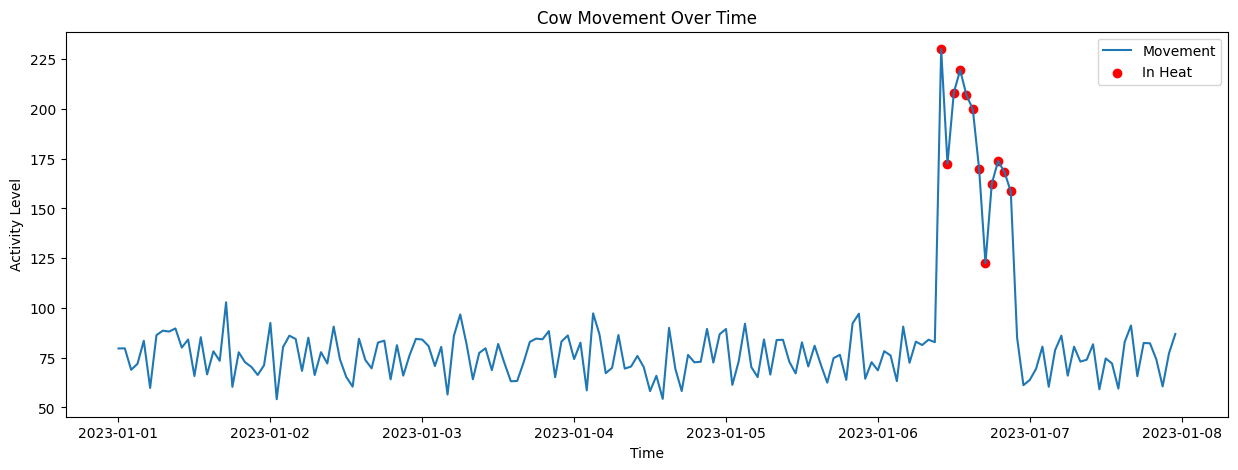

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(data.index, data['Movement'], label='Movement')
plt.scatter(data.index[data['InHeat']], data['Movement'][data['InHeat']], color='red', label='In Heat')
plt.legend()
plt.title('Cow Movement Over Time')
plt.xlabel('Time')
plt.ylabel('Activity Level')
plt.show()


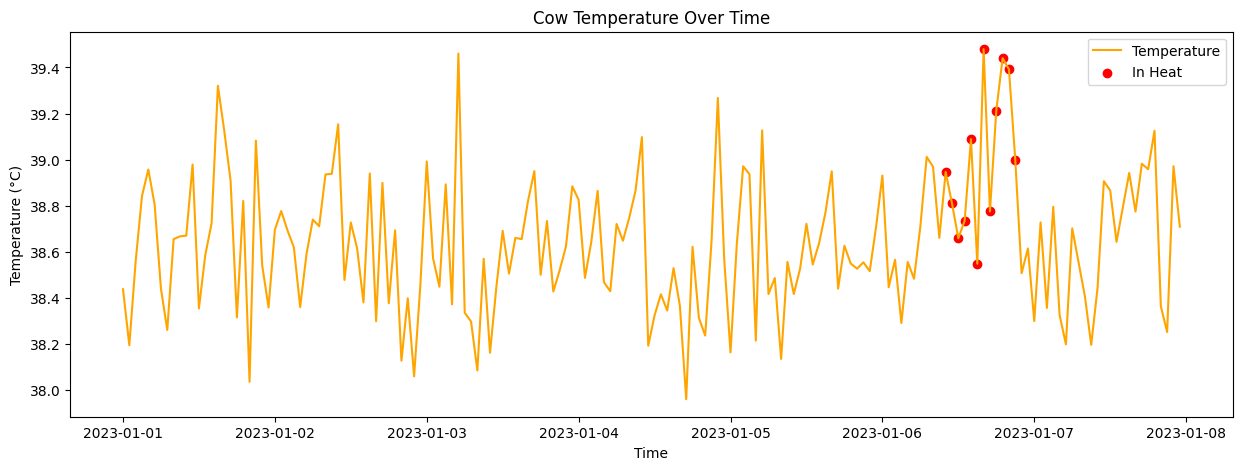

In [19]:
plt.figure(figsize=(15, 5))
plt.plot(data.index, data['Temperature'], label='Temperature', color='orange')
plt.scatter(data.index[data['InHeat']], data['Temperature'][data['InHeat']], color='red', label='In Heat')
plt.legend()
plt.title('Cow Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.show()


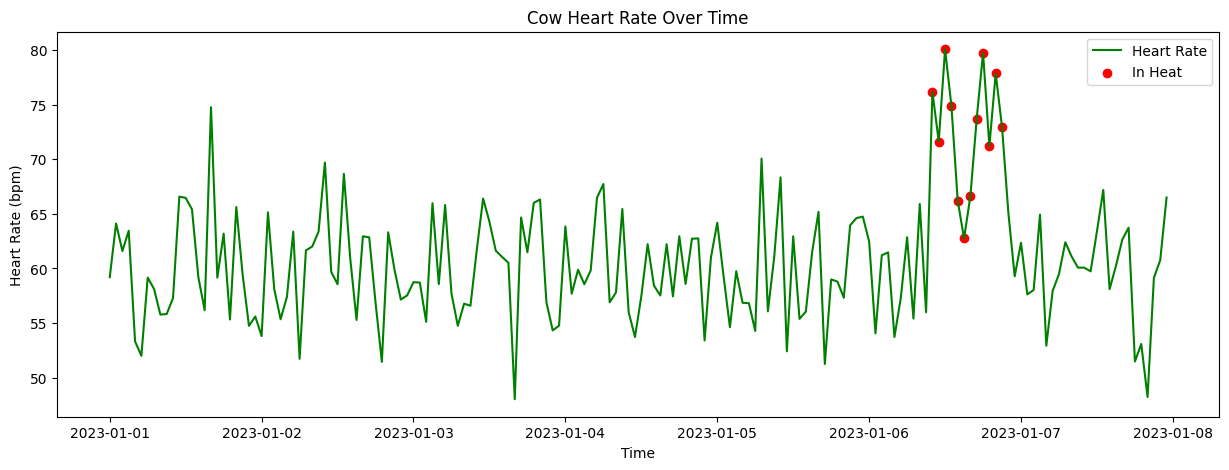

In [20]:
plt.figure(figsize=(15, 5))
plt.plot(data.index, data['HeartRate'], label='Heart Rate', color='green')
plt.scatter(data.index[data['InHeat']], data['HeartRate'][data['InHeat']], color='red', label='In Heat')
plt.legend()
plt.title('Cow Heart Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate (bpm)')
plt.show()


# Multiple cows simulation

In [23]:
num_cows = 10
all_data = []

for cow_id in range(1, num_cows + 1):
    is_in_heat = generate_heat_status(total_hours)
    movement_data = simulate_movement(is_in_heat, total_hours)
    temperature_data = simulate_temperature(is_in_heat, total_hours)
    heart_rate_data = simulate_heart_rate(is_in_heat, total_hours)
    
    cow_data = pd.DataFrame({
        'CowID': cow_id,
        'Timestamp': time_index,
        'InHeat': is_in_heat,
        'Movement': movement_data,
        'Temperature': temperature_data,
        'HeartRate': heart_rate_data
    })
    all_data.append(cow_data)

# Combine all cows' data
all_cows_data = pd.concat(all_data)
all_cows_data.set_index(['CowID', 'Timestamp'], inplace=True)

# Display the first few rows
all_cows_data.head(100)


InHeat   Movement  Temperature  HeartRate
CowID Timestamp                                                     
1     2023-01-01 00:00:00   False  63.927285    38.890555  61.117421
      2023-01-01 01:00:00   False  93.404289    38.632155  57.595558
      2023-01-01 02:00:00   False  86.724397    38.674686  64.247008
      2023-01-01 03:00:00   False  83.418781    38.210610  55.883635
      2023-01-01 04:00:00   False  58.046756    38.343661  65.758890
...                           ...        ...          ...        ...
      2023-01-04 23:00:00   False  78.418643    38.557989  49.640603
      2023-01-05 00:00:00   False  70.024182    38.843398  49.415386
      2023-01-05 01:00:00   False  85.991378    39.292496  56.067971
      2023-01-05 02:00:00   False  79.249949    38.660554  67.196387
      2023-01-05 03:00:00   False  60.107771    38.689935  59.975422

[100 rows x 4 columns]